In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("D:/ML_OPS/Network Security Mlops Project/MLOps_Network-Security/notebook/phisingData.csv")
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [3]:
df.shape

(11055, 31)

In [4]:
# checking for null values
df.isnull().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [6]:
df.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


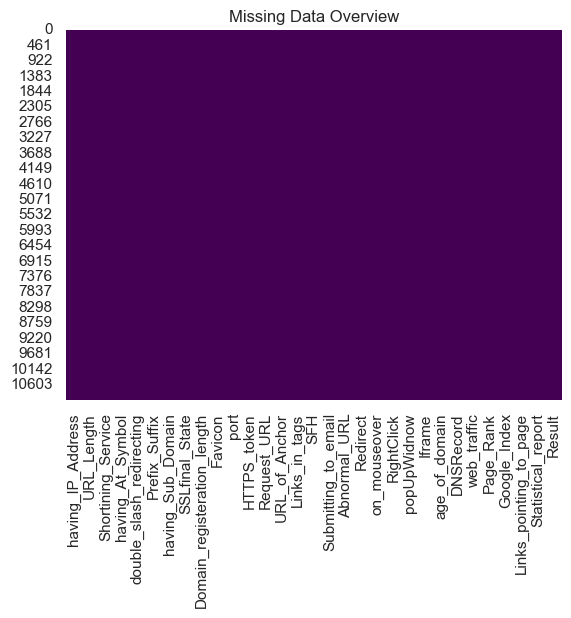

In [7]:
## Heatmap for the Correlation
sns.heatmap(df.isna(), cbar=False, cmap='viridis')  
plt.title('Missing Data Overview')  
plt.show() 


In [8]:
print('Duplicates:', df.duplicated().sum())  
df = df.drop_duplicates()

Duplicates: 5206


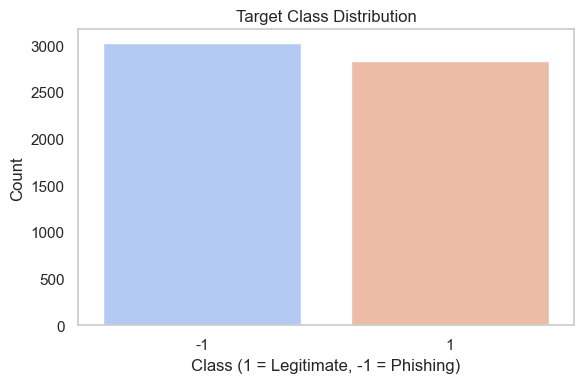

In [9]:
# Target Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Result', data=df, palette='coolwarm')
plt.title("Target Class Distribution")
plt.xlabel("Class (1 = Legitimate, -1 = Phishing)")
plt.ylabel("Count")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

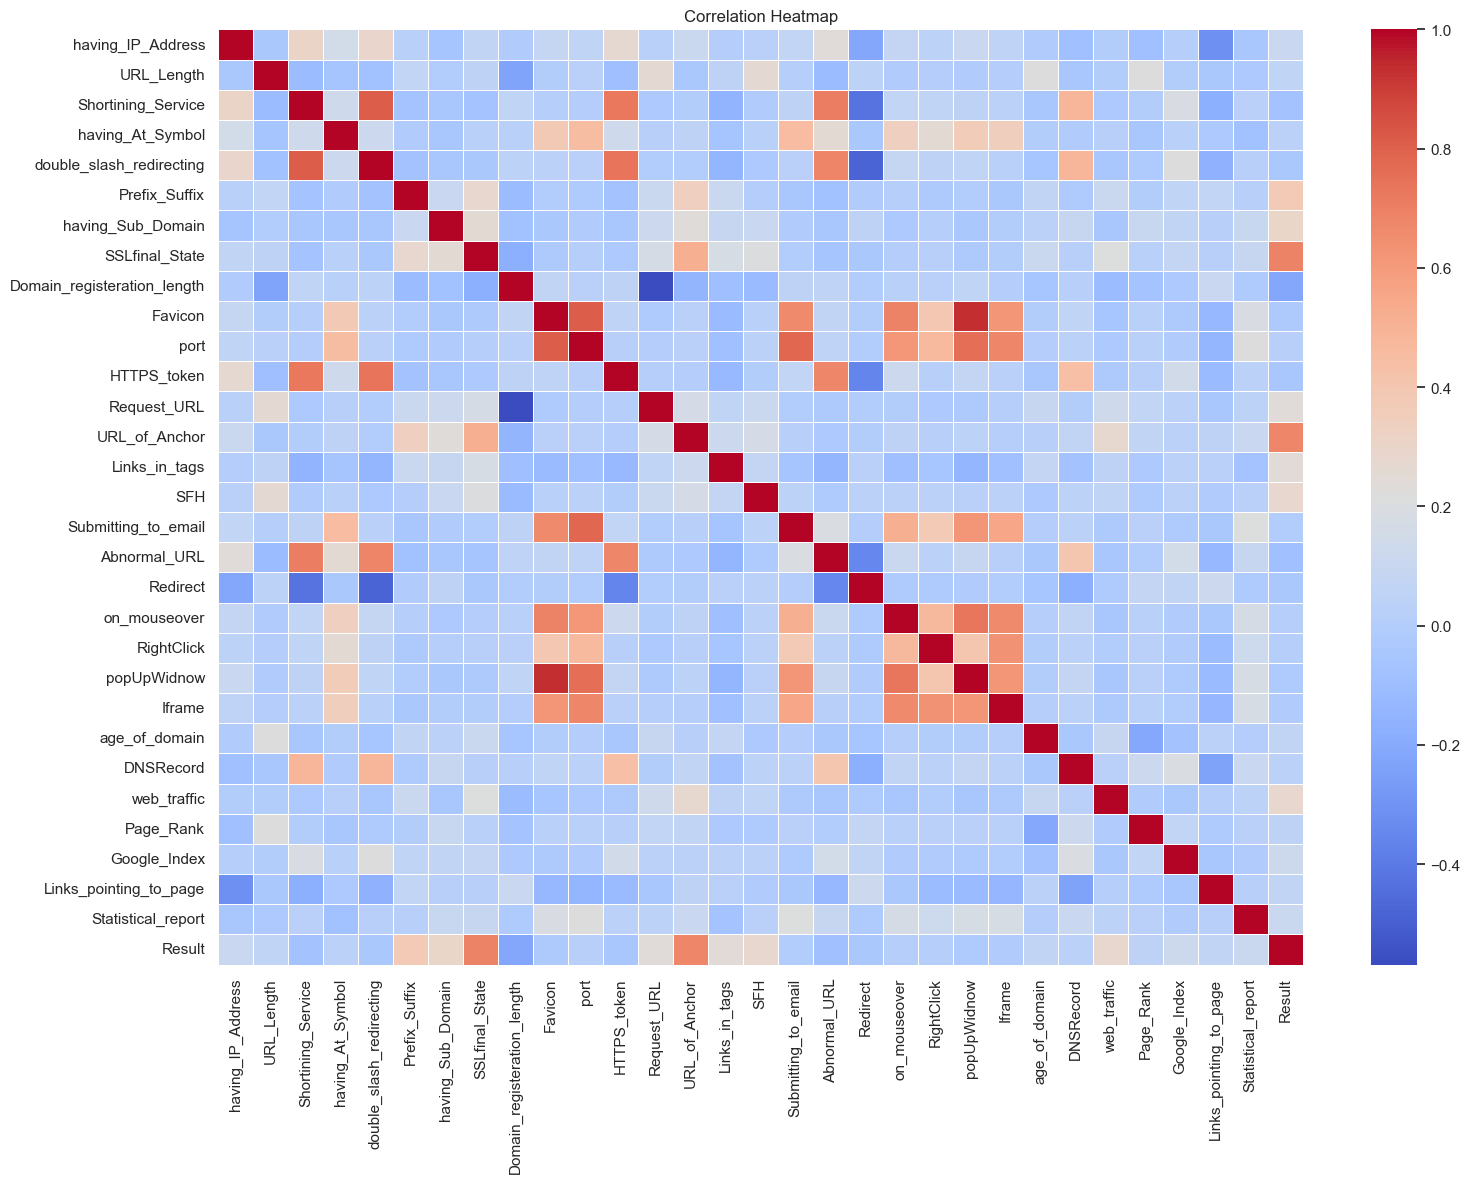

In [10]:
# 3. Correlation Heatmap
plt.figure(figsize=(16, 12))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

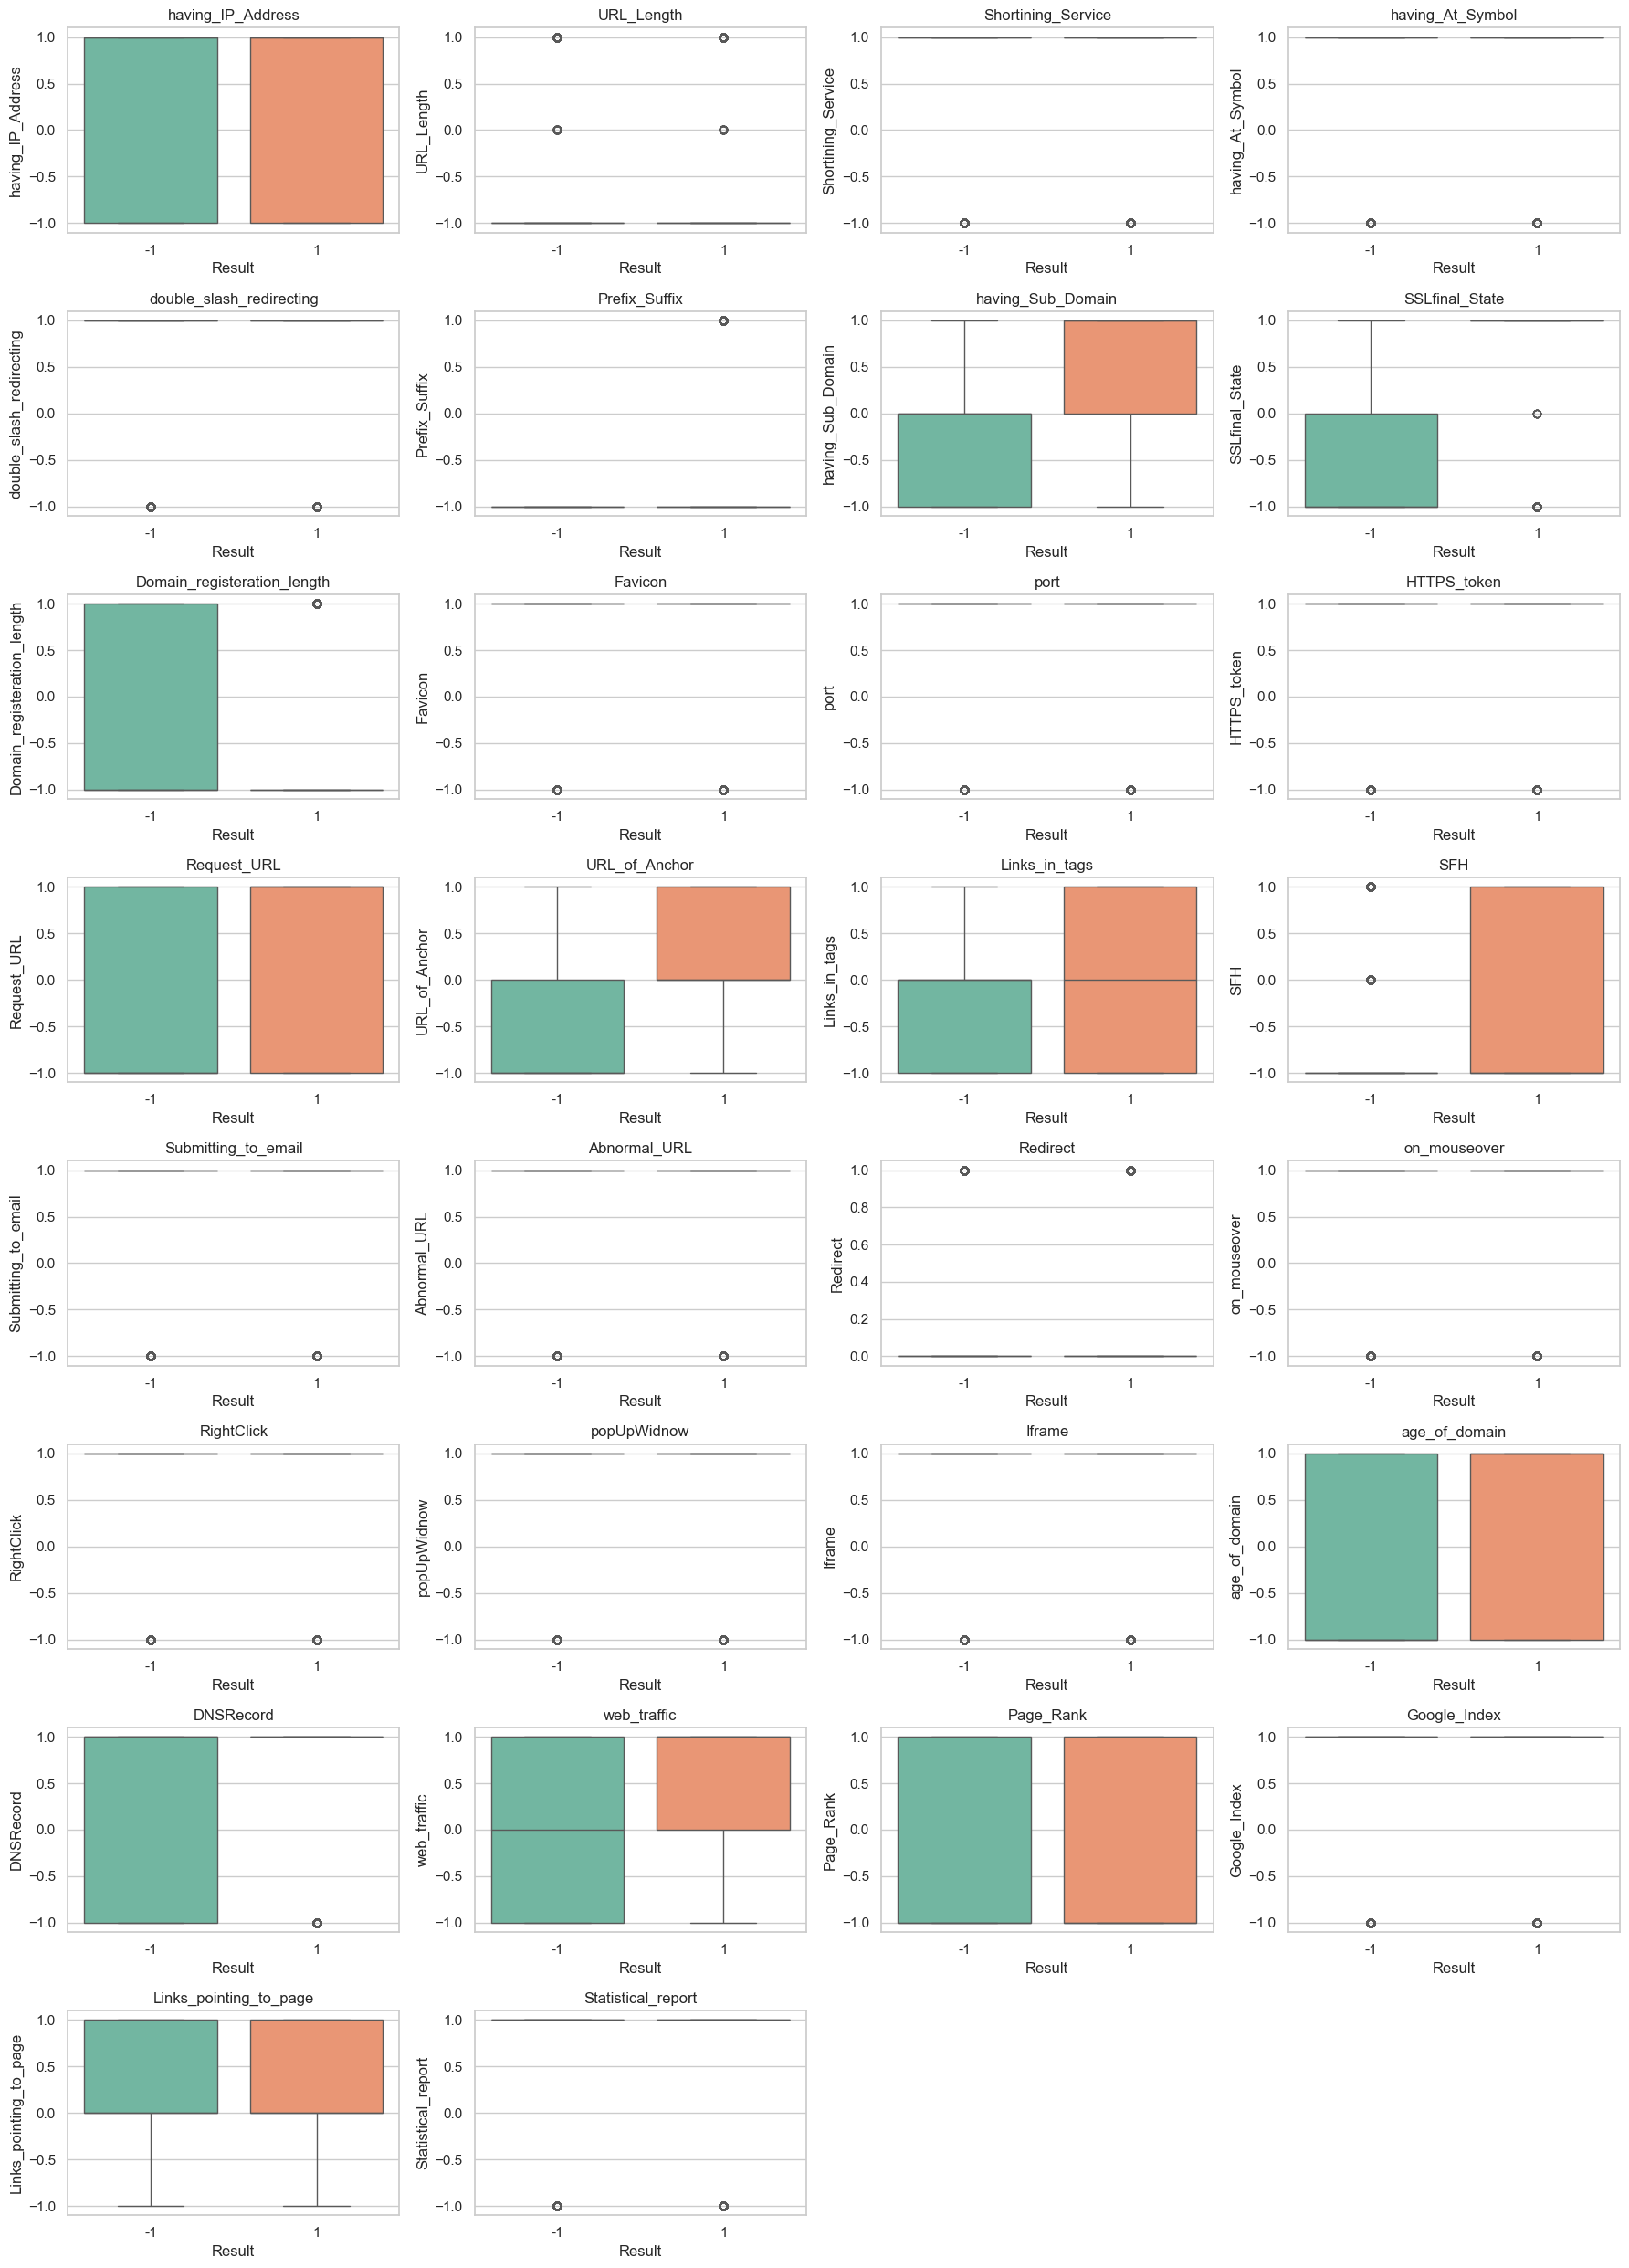

In [11]:
# 4. Boxplots for All Features by Target
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Result')
plt.figure(figsize=(18, 25))
for i, col in enumerate(num_cols):
    plt.subplot(8, 4, i + 1)
    sns.boxplot(x='Result', y=col, data=df, palette='Set2')
    plt.title(col)
    plt.tight_layout()
plt.show()

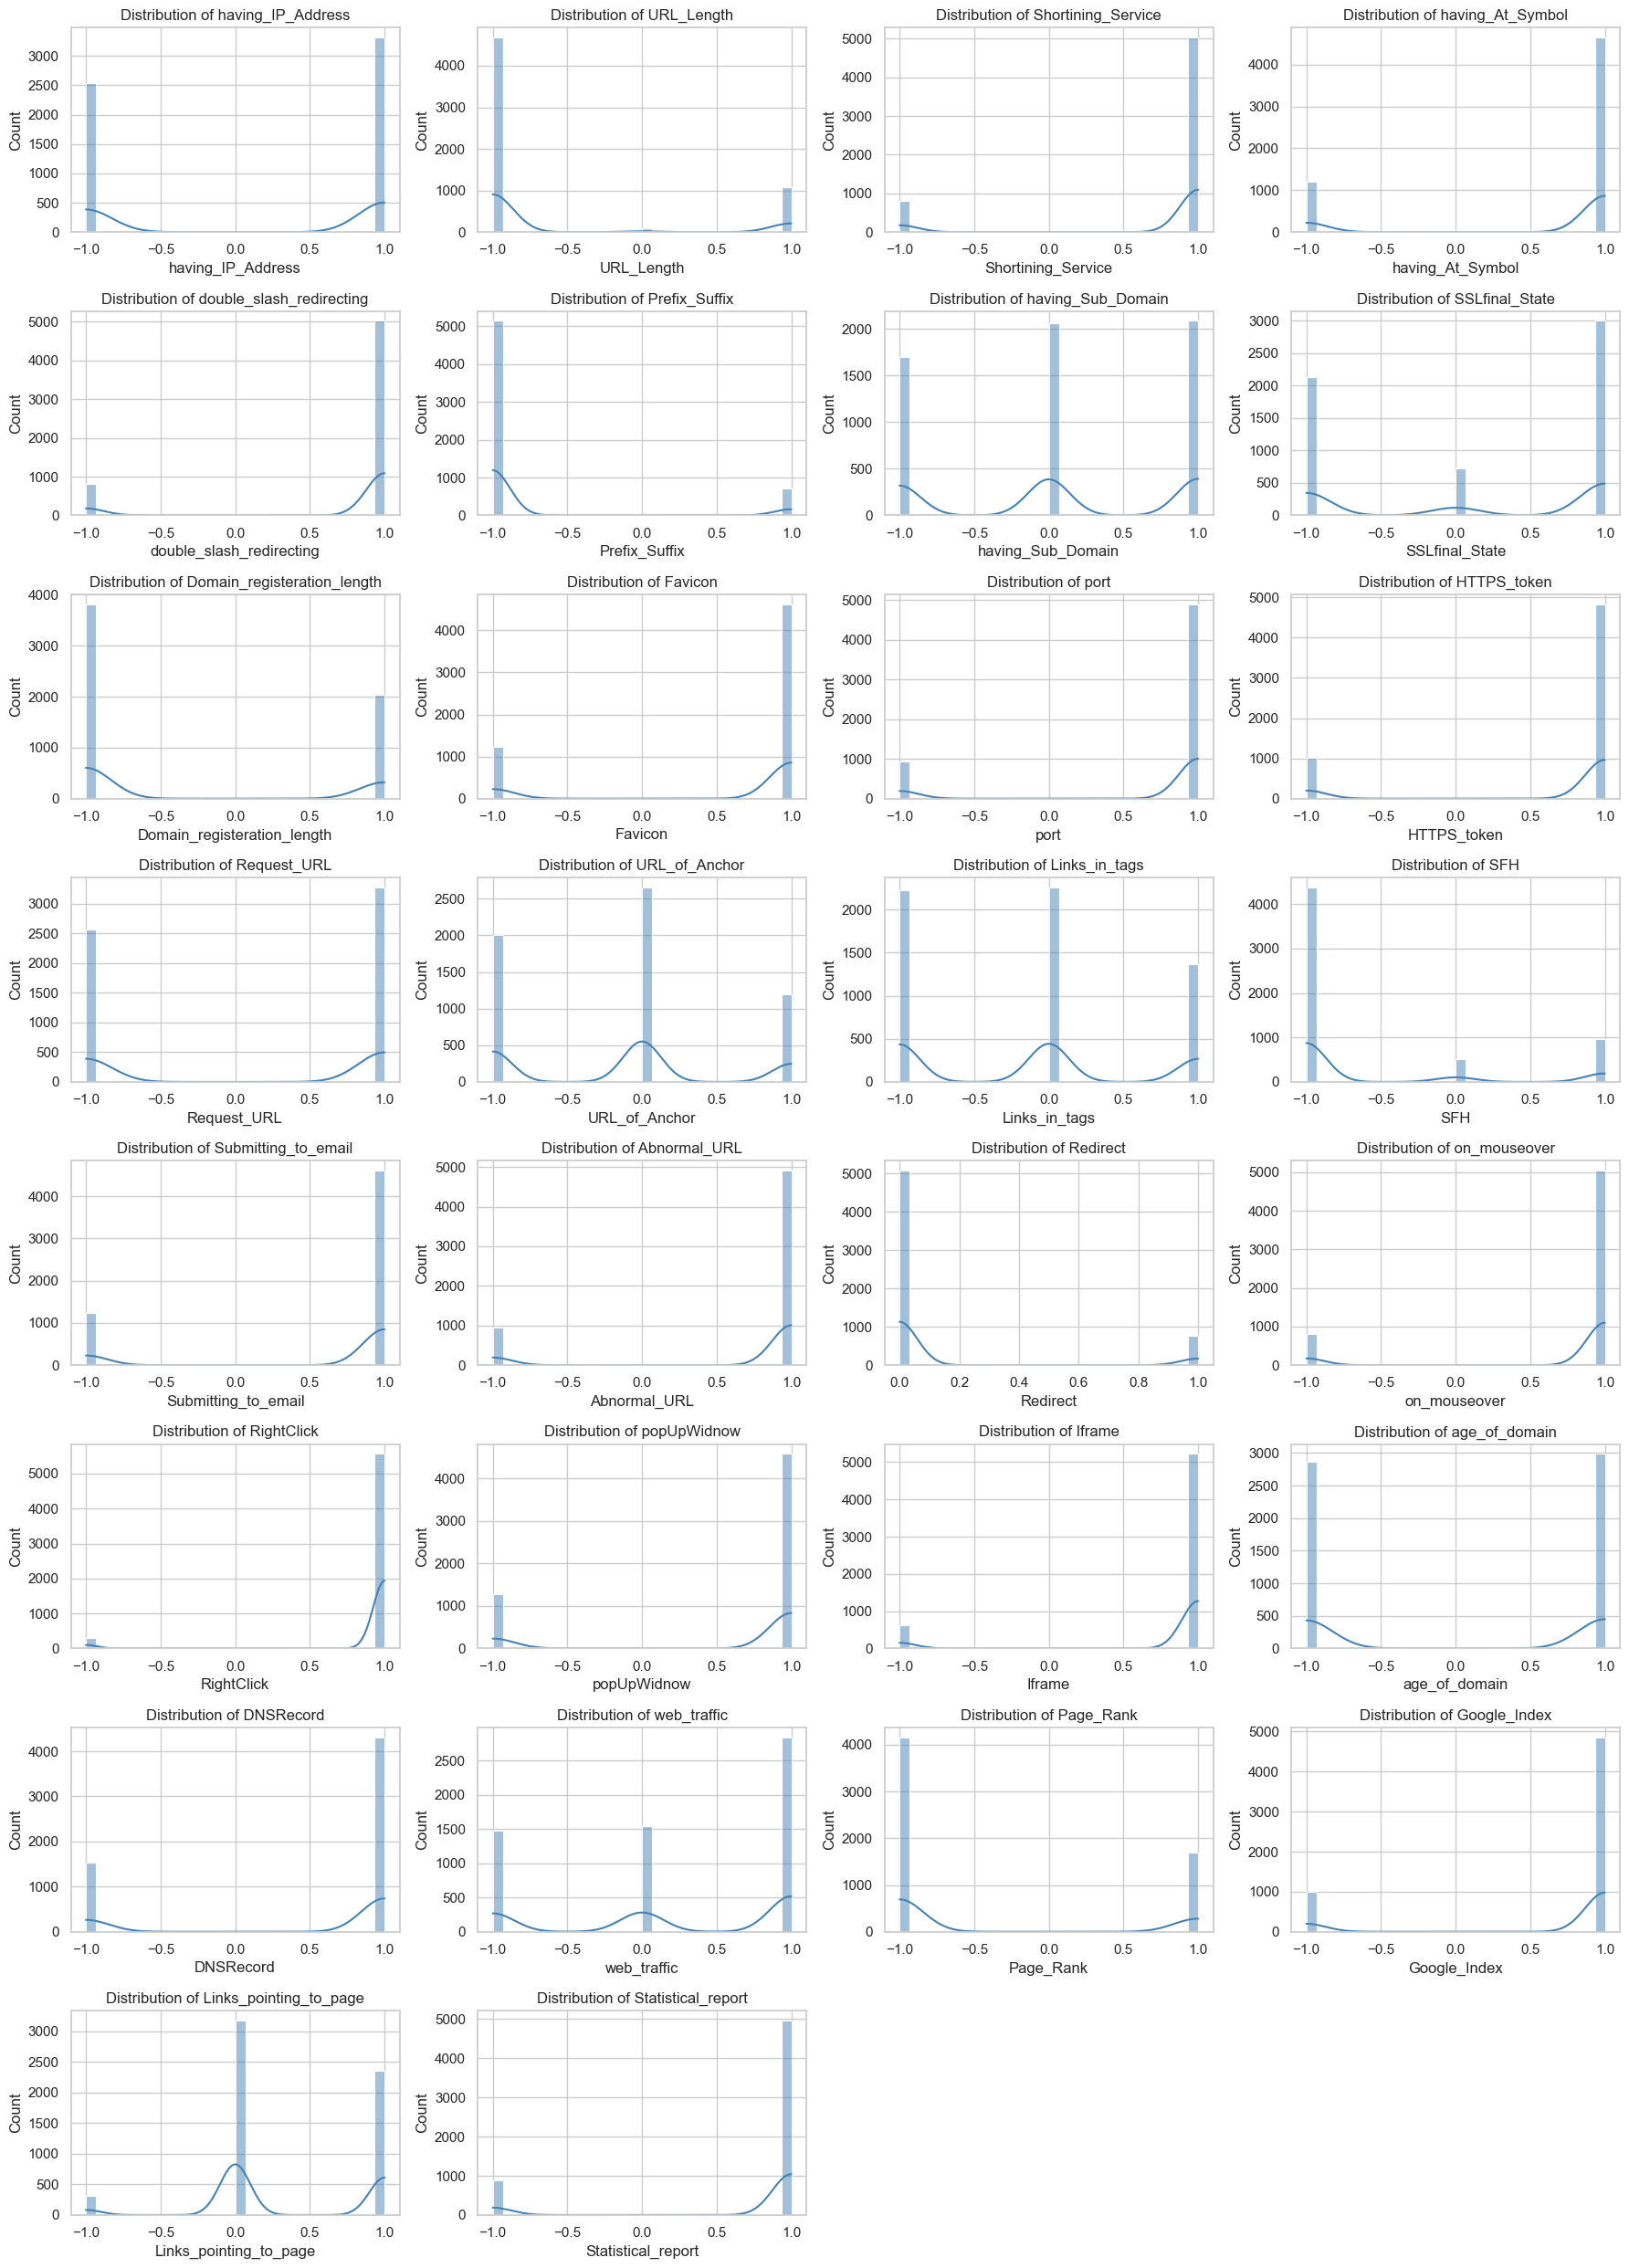

In [12]:
# 5. Distribution Plots
plt.figure(figsize=(18, 25))
for i, col in enumerate(num_cols):
    plt.subplot(8, 4, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='steelblue')
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
plt.show()


In [13]:

# 6. Top Correlated Features with Target
target_corr = df.corr()['Result'].drop('Result').sort_values(key=abs, ascending=False)
print("\n📌 Top 10 Correlated Features with Result:\n", target_corr.head(10))



📌 Top 10 Correlated Features with Result:
 SSLfinal_State                 0.693228
URL_of_Anchor                  0.679125
Prefix_Suffix                  0.381134
having_Sub_Domain              0.296214
web_traffic                    0.281709
SFH                            0.281131
Links_in_tags                  0.243864
Request_URL                    0.237778
Domain_registeration_length   -0.218623
Google_Index                   0.118217
Name: Result, dtype: float64


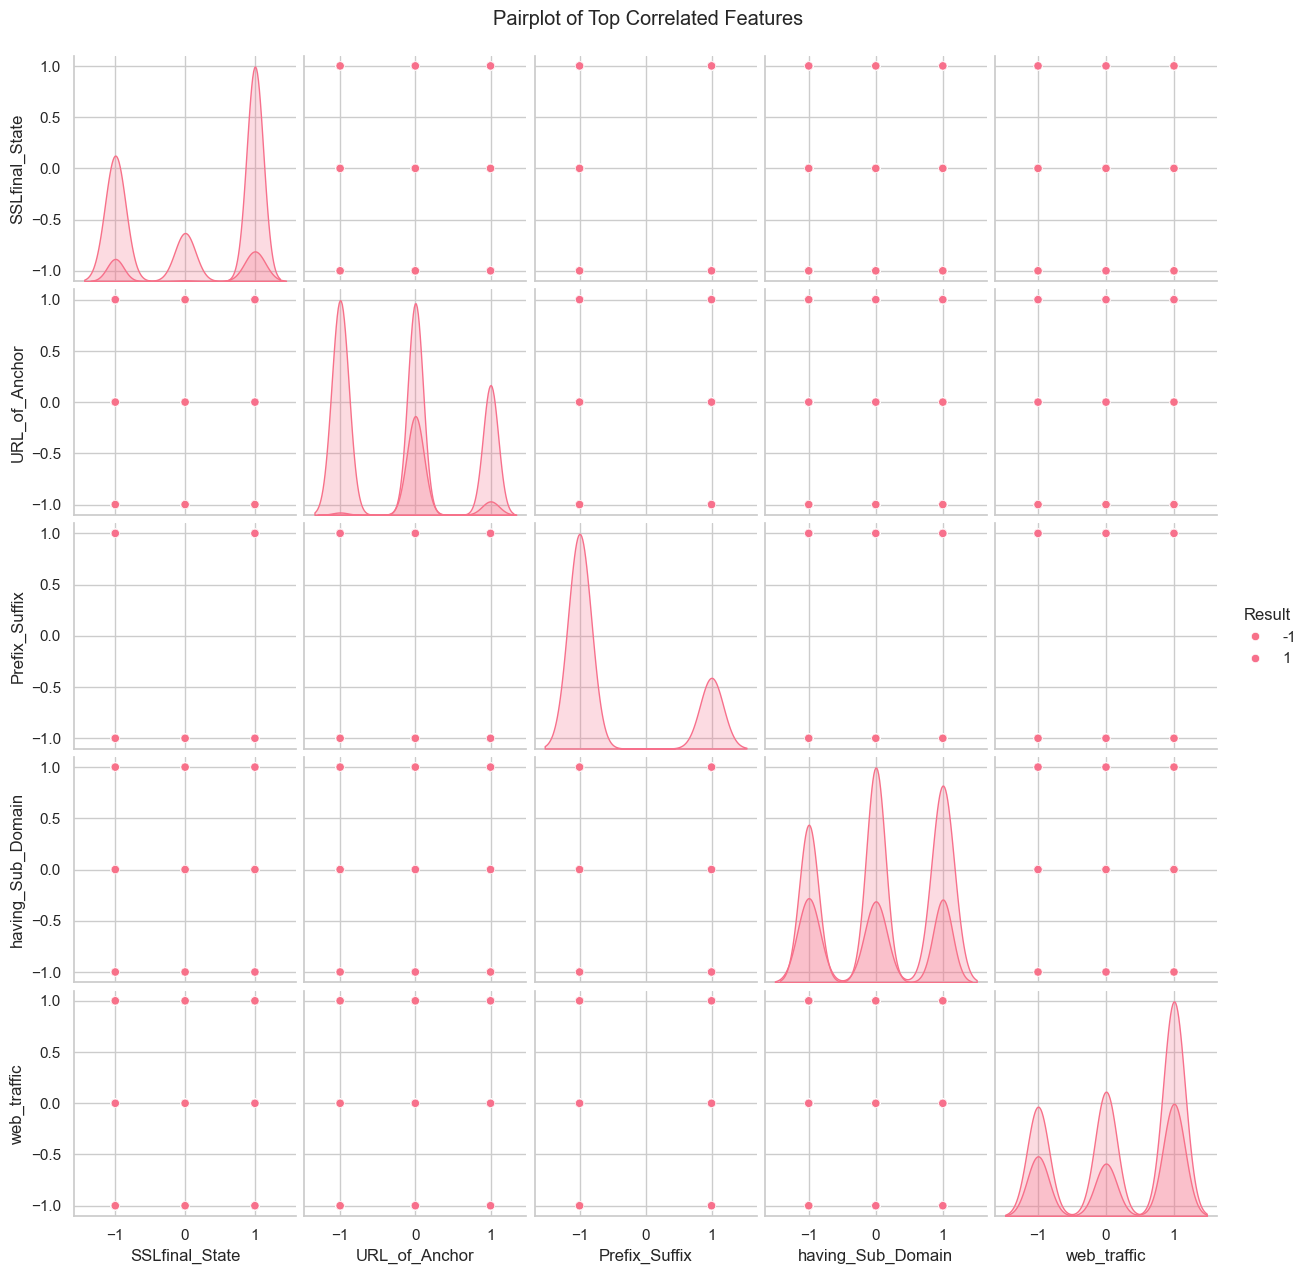

In [14]:
# 7. Pairplot of Top Correlated Features
top_features = target_corr.head(5).index.tolist()
sns.pairplot(df[top_features + ['Result']], hue='Result', palette='husl')
plt.suptitle("Pairplot of Top Correlated Features", y=1.02)
plt.show()

In [15]:
from collections import Counter

count = Counter(df["Result"])
print(count)

Counter({-1: 3019, 1: 2830})


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler  
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

# === System Warnings ===
import warnings
warnings.filterwarnings("ignore")


In [17]:
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [19]:
# Preparing the Input and the Output Data
X = df.drop(columns = ["Result"])
y = df["Result"]

In [21]:
# Split Data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [38]:
model_configs = [
    {
        "name": "LogisticRegression",
        "estimator": LogisticRegression(max_iter=1000),
        "params": {
            'penalty': ['l1', 'l2', 'elasticnet', 'none'],
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg'],
            'max_iter': [100, 200, 500, 1000],
            'l1_ratio': [0.1, 0.5, 0.7, 1.0]
        }
    },
    {
        "name": "RandomForest",
        "estimator": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [None, 10, 20]
        }
    },
    {
        "name": "GradientBoosting",
        "estimator": GradientBoostingClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "learning_rate": [0.01, 0.1],
            "max_depth": [3, 5]
        }
    },
    {
        "name": "SVC",
        "estimator": SVC(),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ["linear", "rbf"]
        }
    }
]


In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
results = {}
for cfg in model_configs:
    name = cfg["name"]
    est = cfg["estimator"]
    params = cfg["params"]

    if name == "LogisticRegression":
        pipe = Pipeline([('scaler', StandardScaler()), ('model', est)])
        gs = GridSearchCV(pipe, param_grid={f"model__{k}": v for k, v in params.items()}, cv=5)
    else:
        gs = GridSearchCV(est, param_grid=params, cv=5)

    gs.fit(X_train, y_train)
    results[name] = {
        "best_estimator": gs.best_estimator_,
        "best_score": gs.best_score_,
        "best_params": gs.best_params_
    }

In [41]:

# Identify top model
best_name = max(results, key=lambda k: results[k]["best_score"])
best = results[best_name]["best_estimator"]

print(f"Best Model: {best_name}")
print(f"Best F1 Score: {results[best_name]['best_score']:.4f}")
print("Best Parameters:", results[best_name]["best_params"])

# Evaluate on test set
y_pred = best.predict(X_test)
print("\n Classification Report on Test Data:")
print(classification_report(y_test, y_pred))

# Feature importance plot if available
if hasattr(best, "named_steps") and hasattr(best.named_steps["model"], "feature_importances_"):
    importances = best.named_steps["model"].feature_importances_
    feat_imp = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

    plt.figure(figsize=(10, 12))
    sns.barplot(x=feat_imp.values, y=feat_imp.index)
    plt.title(f"🔍 Feature Importance - {best_name}")
    plt.tight_layout()
    plt.show()
    print("\n Top Feature:", feat_imp.idxmax())
else:
    print("\n Feature importance not available for this model.")


Best Model: GradientBoosting
Best F1 Score: 0.9521
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

 Classification Report on Test Data:
              precision    recall  f1-score   support

          -1       0.96      0.95      0.96       620
           1       0.94      0.96      0.95       550

    accuracy                           0.95      1170
   macro avg       0.95      0.95      0.95      1170
weighted avg       0.95      0.95      0.95      1170


 Feature importance not available for this model.



 Classification Report:
              precision    recall  f1-score   support

          -1       0.96      0.95      0.96       620
           1       0.94      0.96      0.95       550

    accuracy                           0.95      1170
   macro avg       0.95      0.95      0.95      1170
weighted avg       0.95      0.95      0.95      1170

 ROC AUC Score: 0.9940029325513197


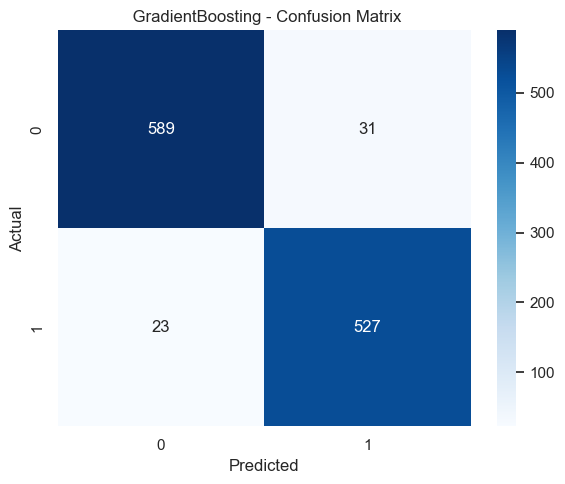

In [48]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Evaluate on test set
y_pred = best.predict(X_test)

# Predict probabilities if available
if hasattr(best, "predict_proba"):
    y_proba = best.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_proba)
else:
    y_proba = None
    roc_auc = "N/A (no predict_proba)"

# Print classification report
print("\n Classification Report:")
print(classification_report(y_test, y_pred))

# Print ROC AUC
print(" ROC AUC Score:", roc_auc)

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title(f" {best_name} - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()